ESCALAMIENTO LINEAL

Es necesario normalizar los datos antes de pasarlos por un modelo de ML ya que son mas eficientes en el rango [-1,1]

Existen diferentes tipos y se utilizan para datos con distribución normal. max-min, Clipping, z-score, Winsorizing, etc. Va a depender de lo que querramos hacer con los datos.

max-min = (2x - min - max) / (min-max)

clipping: se definen valores min y max, los valores que queden afuera del rango van a tomar el valor del min o max según sea el lado de cuál estén. El problema es que modifica los datos, ya que le asigna nuevos valores y se pierden los originales.

z-score: (x - promedio) / desviación estandar. Pueden haber numeros que no sean -1,1 pero no quedan tan lejos. 

In [186]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns

In [3]:
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

In [53]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [57]:
z_scores_raw = (raw - mean) / std

In [202]:
type(raw)

numpy.ndarray

In [204]:
def scaled_max_min(x):
    scaled = (2*x-x(x) - min(x))/(max(x) - min(x))
    return scaled
    

In [137]:
scaled = (2*raw-max(raw) - min(raw))/(max(raw) - min(raw))

In [11]:
std = np.std(raw)
std

0.0475651494154494

In [13]:
mean = np.mean(raw)
mean

-2.2455642172282577e-16

In [33]:
# Normalización Z-score
z_scores = [(x - mean) / std for x in raw]
z_scores = [z.item() if isinstance(z, np.ndarray) else z for z in z_scores]

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

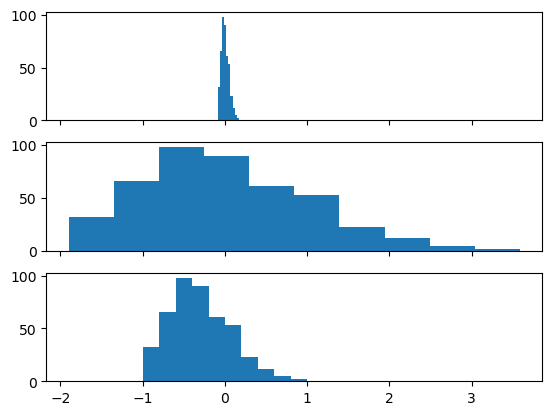

In [141]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].hist(raw)
axs[1].hist(z_scores_raw)
axs[2].hist(scaled)

In [143]:
# modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_z_score():
    linear_model.LinearRegression().fit(z_scores_raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [153]:
raw_time = timeit.timeit(train_raw, number =100)
z_scores_time = timeit.timeit(train_z_score, number =100)
scaled_time = timeit.timeit(train_scaled, number =100)

print('train raw: {}'.format(raw_time))
print('train z scores: {}'.format(z_scores_time))
print('train scaled: {}'.format(scaled_time))

train raw: 0.04955633380450308
train z scores: 0.019741417141631246
train scaled: 0.014881041133776307


max-min scaling: mejor para datos unifrmemente distribuidos


z-score scaling: mejor para datos distribuidos "normalmente" (forma campana de gauss)

TRANSFORMACIONES NO LINEALES


Si tengo datos que no se encuentran distribuidos de forma simétrica le aplicamos una transformación no lineal para que si lo estén y luego se aplican los escalamientos lineales para el modelo de ML

Existen diferentes tipos como las logaritmicas, sigmoide, polinomiales, etc.

Al aplicar estas transformaciones, valores outliers que parecían muy distantes, quedan cercanos a los valores 1 o -1 y esto achica las distancias.

In [157]:
df = pd.read_csv('cars.csv')

In [188]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_usd', ylabel='Count'>

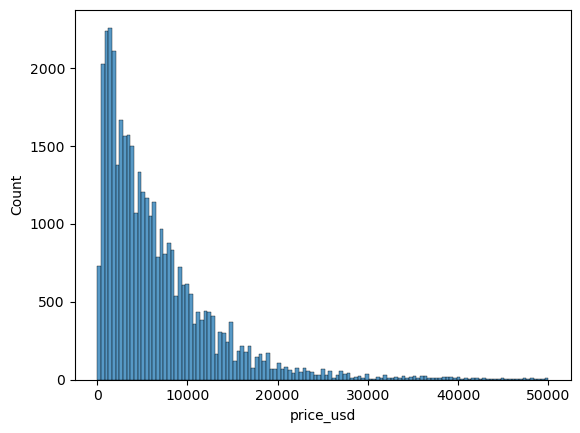

In [192]:
sns.histplot(df, x='price_usd')

<Axes: >

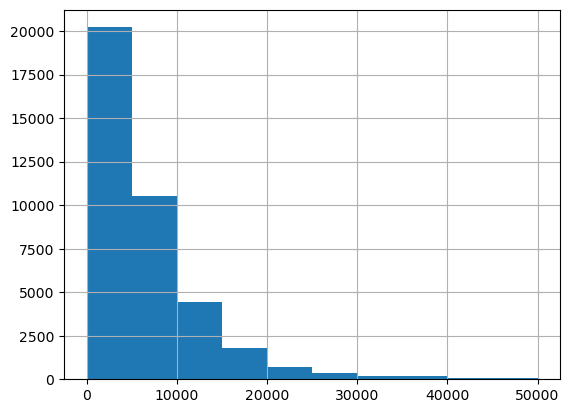

In [161]:
df.price_usd.hist()

Vemos que los precios de los autos se encuentran distribuidos de una forma muy sesgada. Vamos a aplicarle la funcion tangente hiperbolica para empezar a distrbuirlos de otra manera.

<Axes: >

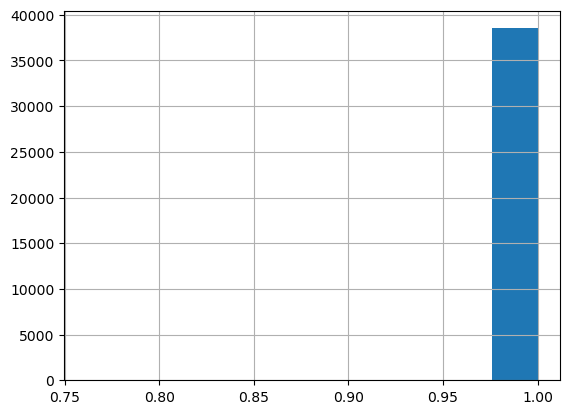

In [169]:
df.price_usd.apply(lambda x: np.tanh(x)).hist()

Al aplicar la tanh directamente, vemos que siguen sesgados. Este tipo de funciones, me permiten ajustarlas mediantes dividir a la variable por un valor entero y que distribuya de otra forma los datos.

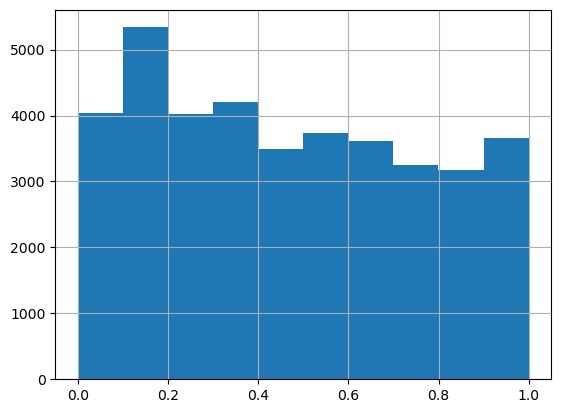

In [206]:
p=10000
df_tanh = df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

Al dividir x por 10000, vemos que los datos se distribuyen de una forma mas pareja. 

In [216]:
df.price_usd.apply(lambda x: np.tanh(x/p))

0        0.796878
1        0.462117
2        0.272905
3        0.761552
4        0.210229
           ...   
38526    0.268271
38527    0.446244
38528    0.405321
38529    0.379949
38530    0.309507
Name: price_usd, Length: 38531, dtype: float64

In [218]:
df_tanh = df.price_usd.apply(lambda x: np.tanh(x/p))

df_tanh ya esta listo para aplicarle una normalizacion y posterior utilizacion en un modelo de ML